# Exercise 1: Train-Test Split

Why is it necessary to split our data into training and testing sets for the purpose of model validation?

Suppose we randomly simulated $p$ vairables $x_1, x_2, \dots, x_p$ from a uniform distribution on $[0, 1]$, and we generated a response variable $y$ sampled from a standard normal distribution $N(0, 1)$. Then, we fitted a linear regression model $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon$ to the data. 



We can then use the fitted model to predict the response variable $y$ for the same set of predictors $x_1, x_2, \dots, x_p$.


standard normal distribution. We then simulated the response variable $y$ from the following model:

If we set the squared correlation $r^2$ between the model fitted values and the observed values as the metric for model performance, we can have the following hypotheses:

$$
H_0: r^2 \leq 0 \\
H_a: r^2 > 0
$$



## Libraries

It's 

In [17]:
import numpy as np # for matrix operations
from sklearn.linear_model import LinearRegression, SGDRegressor # for linear regression
from data_generator import make_data, get_dataframe, get_r2
from visualization import show_first_3_cows

## Data

matrix equation is expressed as below

$$
X =
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
\end{bmatrix}

$$

$$
y =
\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix}
$$

In [131]:
n = 10 # number of observations (cows)
p = 5 # number of variables (features)

In [3]:
# generate a matrix that has n rows and p columns (n x p)
X = np.random.rand(n, p).round(4)
y = np.random.normal(loc=0, scale=1, size=n).round(4) # generate random target variable
display(X)
display(y)

array([[0.5671, 0.1768, 0.9469, 0.0842, 0.0645],
       [0.1139, 0.2002, 0.4716, 0.7875, 0.3272],
       [0.5462, 0.7942, 0.4904, 0.6873, 0.9502],
       [0.1956, 0.1899, 0.8179, 0.9486, 0.4817],
       [0.6228, 0.4744, 0.3554, 0.8051, 0.3698],
       [0.6755, 0.9839, 0.0548, 0.1977, 0.8752],
       [0.5184, 0.8081, 0.9256, 0.8805, 0.7615],
       [0.9421, 0.8634, 0.1142, 0.51  , 0.8142],
       [0.393 , 0.759 , 0.2897, 0.7491, 0.6296],
       [0.8742, 0.7449, 0.0143, 0.2264, 0.0335]])

array([ 0.1712, -0.3198, -1.2586, -0.8699, -0.4674,  0.8142,  1.8342,
        0.0386, -2.204 , -0.1039])

In [4]:
X, y = make_data(n, p)
data = get_dataframe(X, y)
data

,id,x_1,x_2,x_3,x_4,x_5,y
0,cow 1,0.2852,0.1803,0.5529,0.5768,0.7212,0.656284
1,cow 2,0.7284,0.5573,0.3300,0.4979,0.8891,0.416798
2,cow 3,0.2433,0.3783,0.1143,0.9770,0.9550,-0.529942
3,cow 4,0.8887,0.0604,0.2581,0.3869,0.2830,0.245912
4,cow 5,0.7209,0.6687,0.1448,0.7738,0.4803,0.823197
5,cow 6,0.5992,0.3498,0.0690,0.2146,0.2304,0.558495
6,cow 7,0.8400,0.6634,0.1524,0.3585,0.0939,-1.030313
7,cow 8,0.6487,0.2783,0.2525,0.1374,0.5417,0.114832
8,cow 9,0.9726,0.5217,0.7102,0.9394,0.8462,-1.602038
9,cow 10,0.5454,0.6126,0.3437,0.5530,0.7845,-1.672117


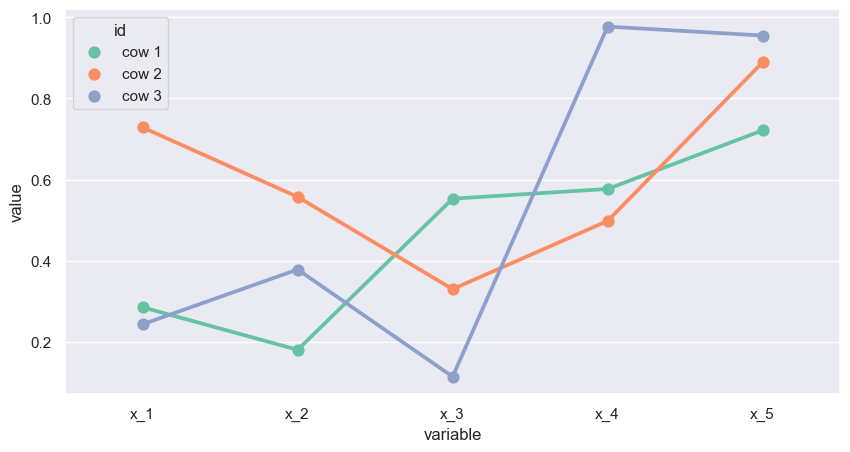

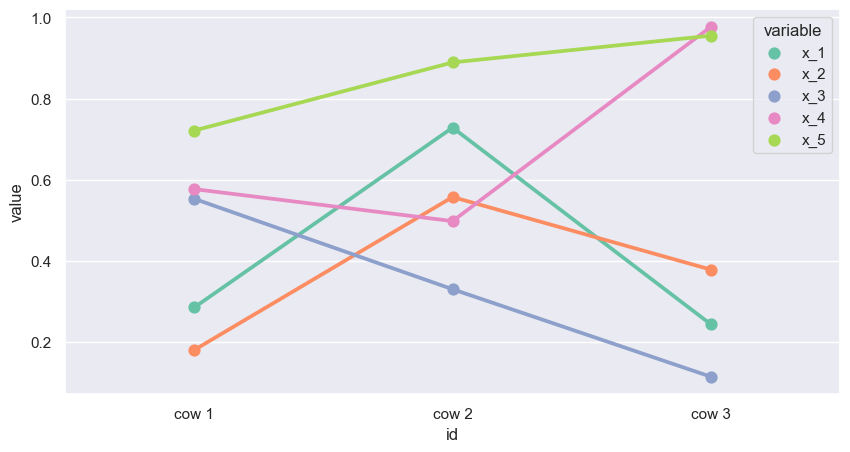

In [122]:
show_first_3_cows(data, xaxis="x")
show_first_3_cows(data, xaxis="id")

In [125]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_fit = linear_model.predict(X)
get_r2(y, y_fit)

0.9579562038601789

In [151]:
n = 10
p = 5
ls_r2 = []
for i in range(1000):
    X, y = make_data(n, p)
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_fit = linear_model.predict(X)
    ls_r2.append(get_r2(y, y_fit))
p_value = np.round(1 - np.mean(np.array(ls_r2) > 0.3), 4)
p_value

0.127

(0.0, 25.0)

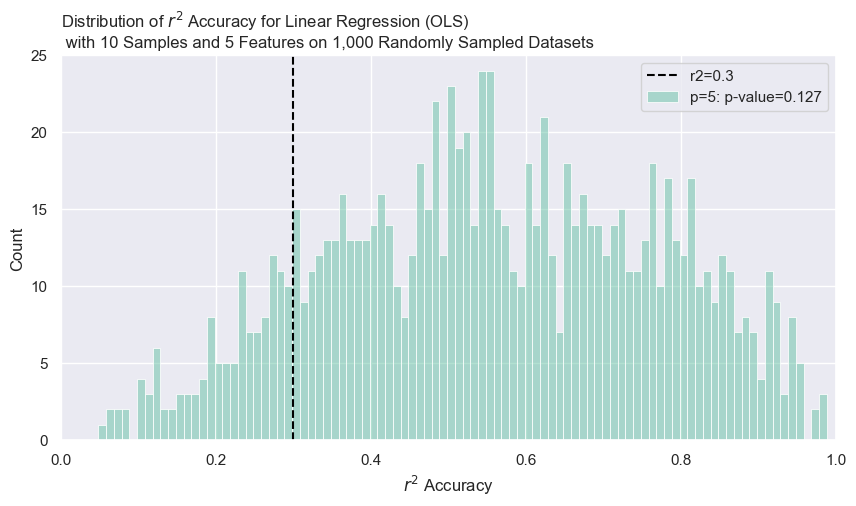

In [154]:
sns.set_theme(style="darkgrid", palette="Set2")
plt.figure(figsize=(10, 5))
sns.histplot(ls_r2, binwidth=.01, alpha=0.5, label=f"p={p}: p-value={p_value}")

# post-process the plot
plt.axvline(x=0.3, color="black", linestyle="--", label="r2=0.3")
plt.title("Distribution of $r^2$ Accuracy for Linear Regression (OLS) \n with 10 Samples and 5 Features on 1,000 Randomly Sampled Datasets", loc="left")
plt.legend()
plt.xlabel("$r^2$ Accuracy")
plt.xlim(0, 1)
plt.ylim(0, 25)

In [117]:
n = 100
results = {}
for p in [5, 10, 20, 40, 60, 80, 95]:
    ls_r2 = []
    for _ in range(100):
        X, y = make_data(n, p)
        # linear_model = SGDRegressor()
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        y_fit = linear_model.predict(X)
        r2 = get_r2(y, y_fit)
        ls_r2 += [r2]
    results[p] = np.array(ls_r2)

p = 5
p = 10
p = 20
p = 40
p = 60
p = 80
p = 95


(0.0, 150.0)

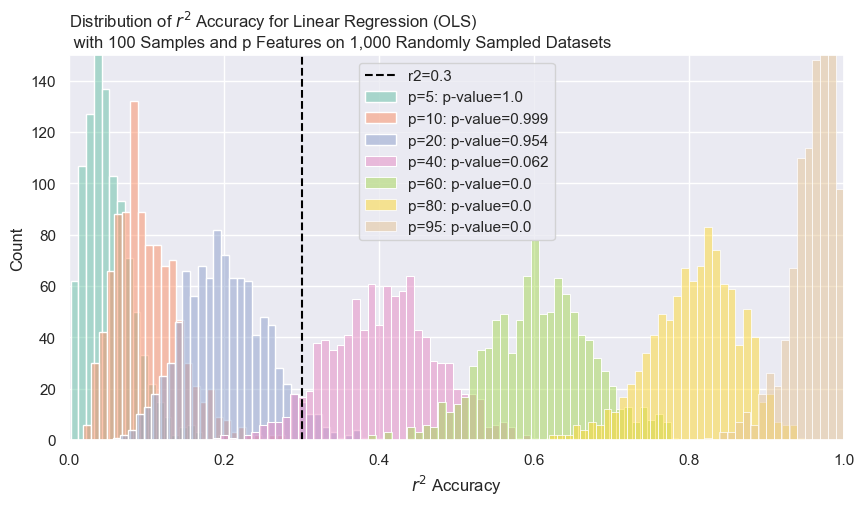

In [121]:
# use seaborn to plot the histogram of r2
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="Set2")
plt.figure(figsize=(10, 5))
for p in results.keys():
    ls_r2 = results[p]
    p_value = np.round(1 - np.mean(np.array(ls_r2) > 0.3), 4)
    sns.histplot(ls_r2, binwidth=.01, alpha=0.5, label=f"p={p}: p-value={p_value}")

plt.axvline(x=0.3, color="black", linestyle="--", label="r2=0.3")
plt.title("Distribution of $r^2$ Accuracy for Linear Regression (OLS) \n with 100 Samples and p Features on 1,000 Randomly Sampled Datasets", loc="left")
plt.legend()
plt.xlim(0, 1)
plt.xlabel("$r^2$ Accuracy")
plt.ylim(0, 150)

In [156]:
# train test split
from sklearn.model_selection import train_test_split

In [234]:
n = 100
p = 40

In [236]:
X, y = make_data(n, p)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [237]:
print("X shape: ", X.shape)
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)

X shape:  (100, 40)
X train shape:  (80, 40)
X test shape:  (20, 40)


In [238]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_fit_cv = linear_model.predict(x_test)
r2_cv = get_r2(y_test, y_fit_cv)
r2_cv

0.10235127547803341

In [239]:
linear_model = LinearRegression()
linear_model.fit(X, y)
y_fit = linear_model.predict(X)
r2 = get_r2(y, y_fit)
r2

0.4568513796031859

In [240]:
ls_r2_cv = []
ls_r2 = []
for _ in range(100):
    # generate data
    X, y = make_data(n, p)
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # fit model
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    y_fit_cv = linear_model.predict(x_test)
    r2_cv = get_r2(y_test, y_fit_cv)
    ls_r2_cv.append(r2_cv)
    # predict
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_fit = linear_model.predict(X)
    r2 = get_r2(y, y_fit)
    ls_r2.append(r2)

Text(0.5, 0, '$r^2$ Accuracy')

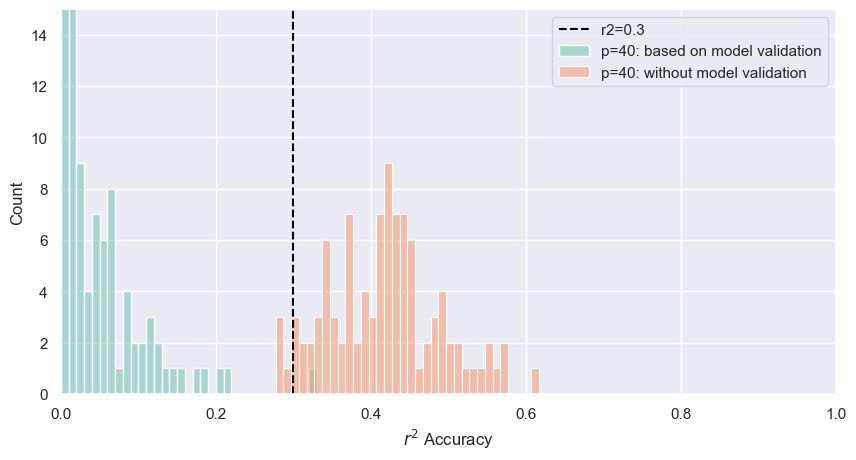

In [241]:
plt.figure(figsize=(10, 5))
sns.histplot(ls_r2_cv, binwidth=.01, alpha=0.5, label=f"p={p}: based on model validation")
sns.histplot(ls_r2, binwidth=.01, alpha=0.5, label=f"p={p}: without model validation")
plt.axvline(x=0.3, color="black", linestyle="--", label="r2=0.3")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 15)
plt.xlabel("$r^2$ Accuracy")

In [242]:
n = 100
p = 40
ls_p_assoc = [5, 10, 20, 30, 40]
results = {}
for p_assoc in ls_p_assoc:
    key = "asc_%d" % p_assoc
    results[key] = {}
    results[key]["with validation"] = []
    results[key]["no validation"] = []
    for _ in range(100):
        # generate data
        X, y = make_data(n, p, p_assoc=p_assoc)
        # train test split
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # fit model
        linear_model = LinearRegression()
        linear_model.fit(x_train, y_train)
        y_fit_cv = linear_model.predict(x_test)
        r2_cv = get_r2(y_test, y_fit_cv)
        results[key]["with validation"].append(r2_cv)
        # predict
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        y_fit = linear_model.predict(X)
        r2 = get_r2(y, y_fit)
        results[key]["no validation"].append(r2)

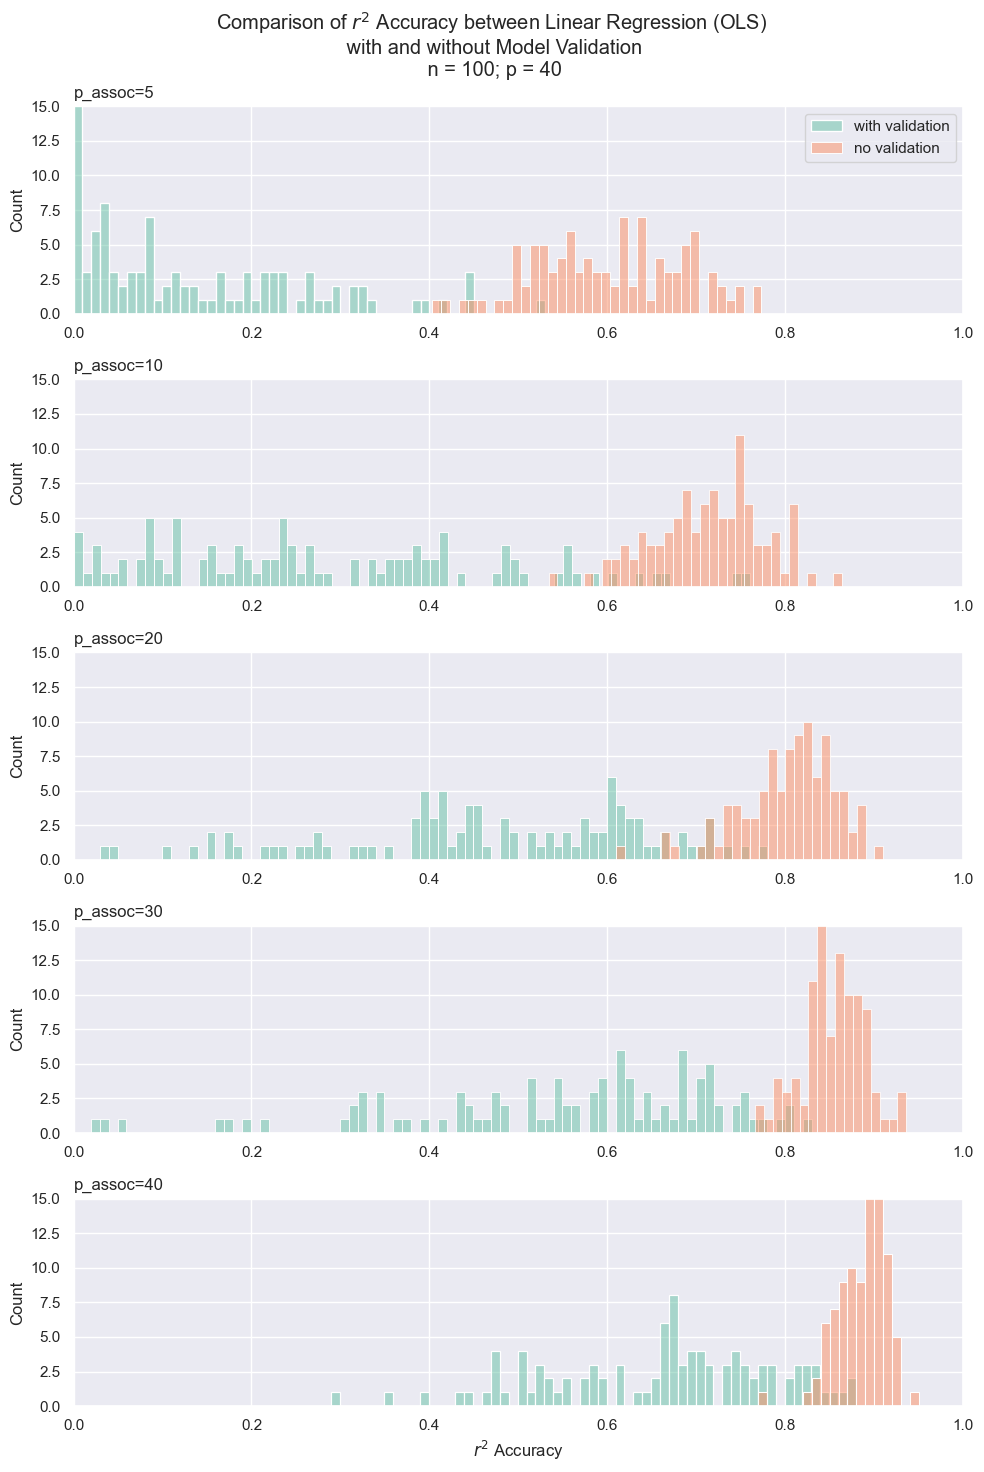

In [248]:
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
for i, p_assoc in enumerate(ls_p_assoc):
    for cv in ["with validation", "no validation"]:
        r2 = results["asc_%d" % p_assoc][cv]
        sns.histplot(r2, binwidth=.01, alpha=0.5,
                    label=f"{cv}",
                    ax=axs[i])
    axs[i].set_title(f"p_assoc={p_assoc}", loc="left")
    axs[i].set_xlim(0, 1)
    axs[i].set_ylim(0, 15)

axs[0].legend()
plt.suptitle(f"Comparison of $r^2$ Accuracy between Linear Regression (OLS) \n with and without Model Validation\n n = {n}; p = {p}")
plt.xlabel("$r^2$ Accuracy")
plt.tight_layout()